In [ ]:
from urllib.request import urlretrieve
import pandas as pd

In [ ]:
iris = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

In [ ]:
data = pd.read_csv(iris, sep=',')

In [ ]:
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [ ]:
column_header = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

data.columns = column_header
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


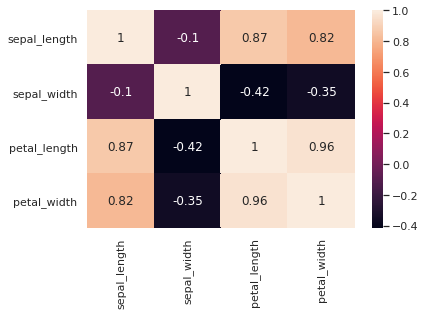

In [ ]:
import seaborn as sns
sns.heatmap(data.corr(), annot=True)

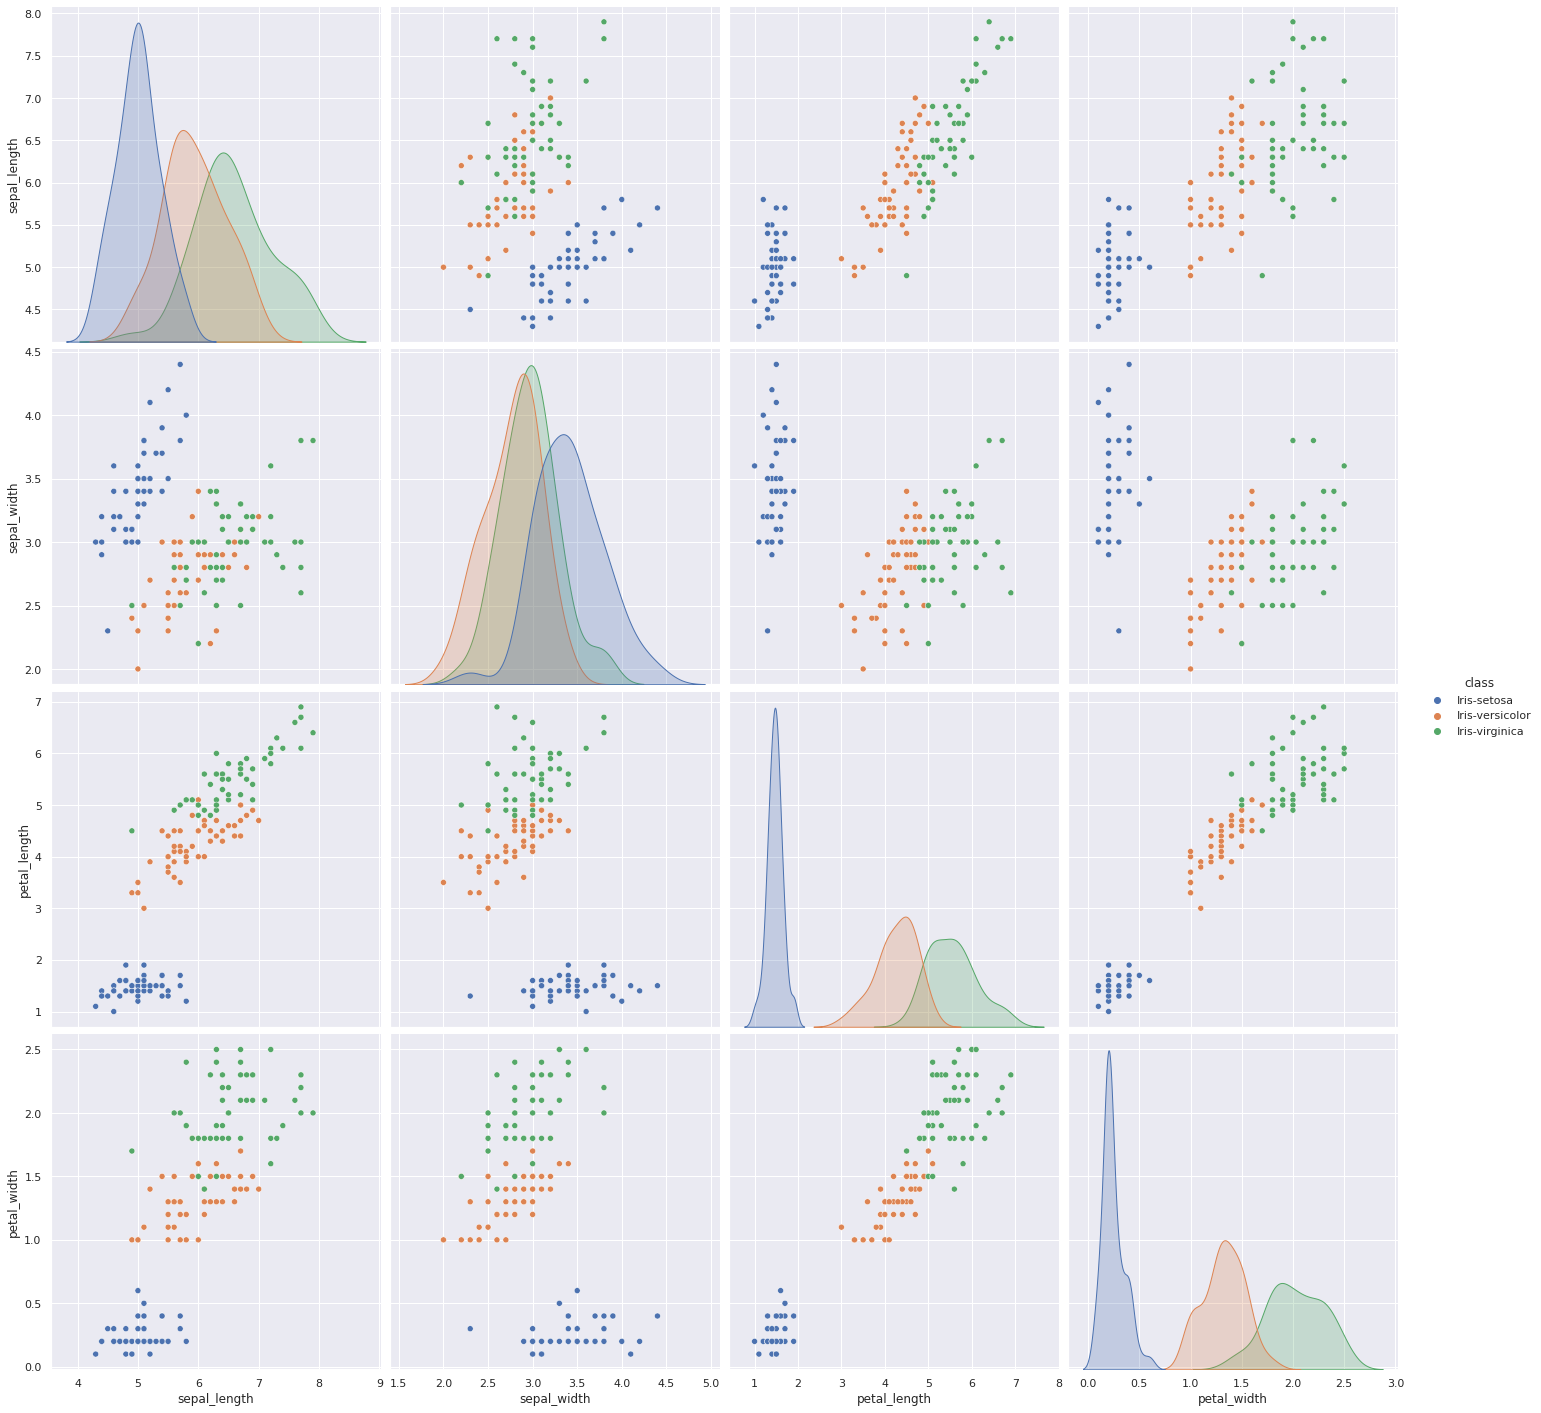

In [ ]:
sns.set()
sns.pairplot(data, hue='class', height=5)

In [ ]:
# pemisahan data independent dan dependen
x = data.drop('class', axis=1)
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


In [ ]:
y = data['class']
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
144    Iris-virginica
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
Name: class, Length: 149, dtype: object

In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
print(data.groupby('class').size())

class
Iris-setosa        49
Iris-versicolor    50
Iris-virginica     50
dtype: int64


Pembagian Testing & Training

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

Algoritma KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

k_range = np.arange(1,20)
train_score_list = []
test_score_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred_train = knn.predict(x_train)
    y_pred_test = knn.predict(x_test)
    train_score_list.append(accuracy_score(y_train,y_pred_train))

    test_score_list.append(accuracy_score(y_test,y_pred_test))

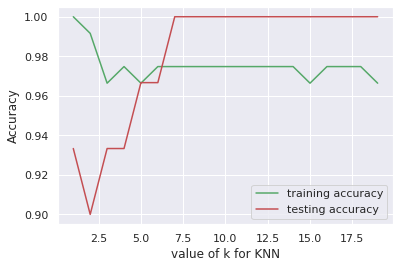

In [ ]:
import matplotlib.pyplot as plt
plt.plot(k_range,train_score_list,color='g',label='training accuracy')
plt.plot(k_range,test_score_list, color='r',label='testing accuracy')
plt.xlabel('value of k for KNN')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred_test = knn.predict(x_test)
y_pred_train = knn.predict(x_train)

In [ ]:
from sklearn.metrics import confusion_matrix
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

0.9663865546218487
0.9666666666666667


menggunakan KNN mendapatkan hasil akurasi yang baik yaitu 96.66%

Algoritma SVM kernel polinomial

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics

svm = SVC(                                                                        # SVM kernel Polinomial
        kernel = 'poly',
        C = 1,
        degree = 2
      )

svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
score = metrics.accuracy_score(y_test,y_pred)
print(score)

1.0


In [ ]:
y_pred = svm.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  0  0]
 [ 0 10  0]
 [ 0  0  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Algoritma SVM kernel Rbf

In [ ]:
svmRbf = SVC(                                                                    # SVM kernel Rbf
    kernel = 'rbf',       
    C = 1,
    gamma = 0.01
    )

svmRbf.fit(x_train,y_train)
y_pred = svmRbf.predict(x_test)
score = metrics.accuracy_score(y_test,y_pred)
print(score)

0.9666666666666667


In [ ]:
y_pred = svmPoly.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  0  0]
 [ 0 10  0]
 [ 0  1  7]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.88      0.93         8

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



Algoritma SVM kernel Linear

In [ ]:
svmLin = SVC(                                                                     # SVM kernel Linear
        kernel = 'linear',          
        C = 1
        )
svmLin.fit(x_train,y_train)
y_pred = svmLin.predict(x_test)
score = metrics.accuracy_score(y_test,y_pred)
print(score)

1.0


In [ ]:
y_pred = svmLin.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  0  0]
 [ 0 10  0]
 [ 0  0  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Algorimta SVM Kernel Sigmoid

In [ ]:
svmSig = SVC(                                                                     # SVM kernel sigmoid
        kernel = 'sigmoid',
        C = 1
        )
svmSig.fit(x_train,y_train)
y_pred = svmSig.predict(x_test)
score = metrics.accuracy_score(y_test,y_pred)
print(score)

0.26666666666666666


In [ ]:
y_pred = svmSig.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0  0 12]
 [ 0  0 10]
 [ 0  0  8]]
                 precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00        12
Iris-versicolor       0.00      0.00      0.00        10
 Iris-virginica       0.27      1.00      0.42         8

       accuracy                           0.27        30
      macro avg       0.09      0.33      0.14        30
   weighted avg       0.07      0.27      0.11        30



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dengan menggunakan algoritma SVM, hasil akurasi terbaik didapat dari kernel linear dan polinomial dengan akurasi 100% / sempurna.

dengan kernel Rbf didapatkan nilai akurasi sebesar 97% dan akurasi terburuk didapat saat menggunakan kernel sigmoid yaitu 27%